In [39]:
import pandas as pd

In [40]:
df=pd.read_csv("insurance.csv")

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
df.shape

(1338, 7)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


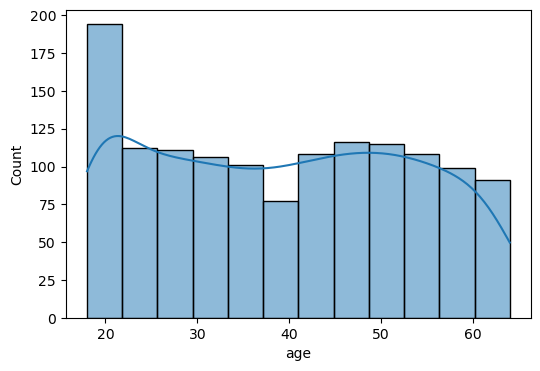

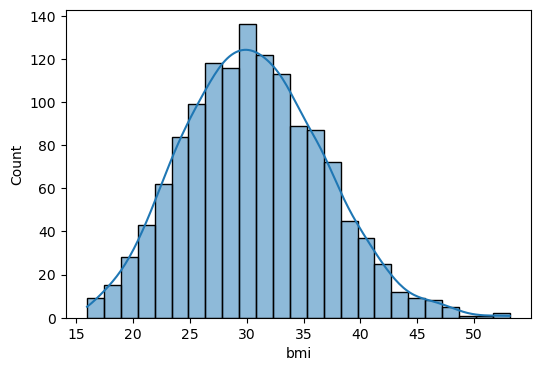

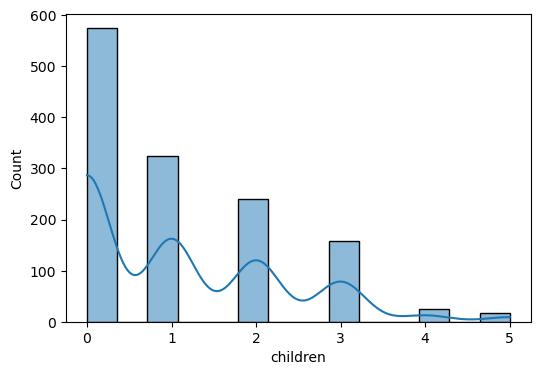

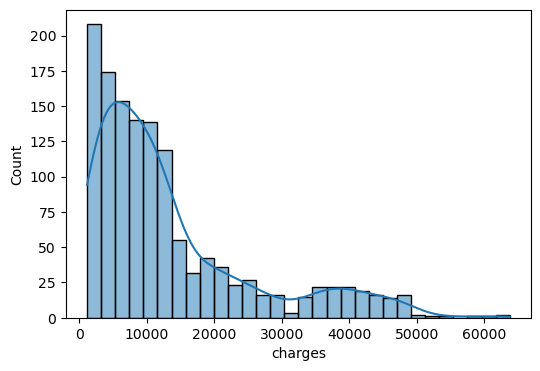

In [46]:
col=['age','bmi','children','charges']
for np in col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[np],kde=True)

<Axes: xlabel='children', ylabel='count'>

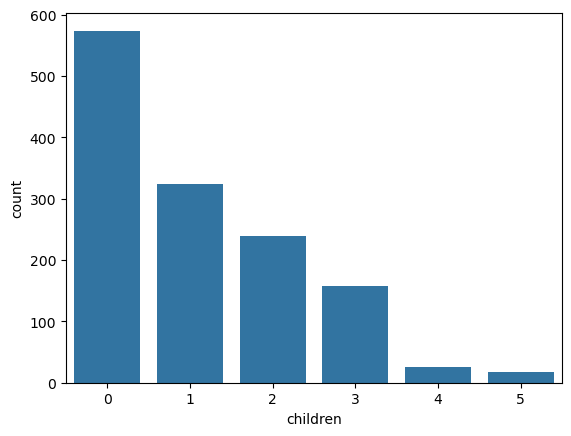

In [47]:
sns.countplot(x=df['children'])

In [48]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

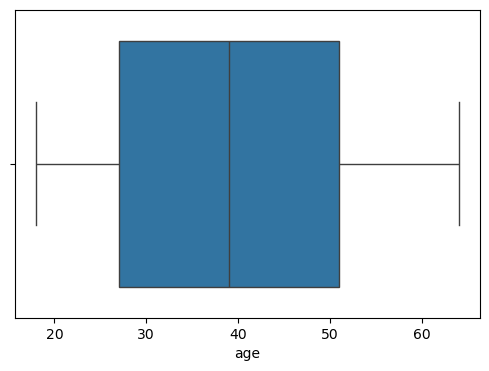

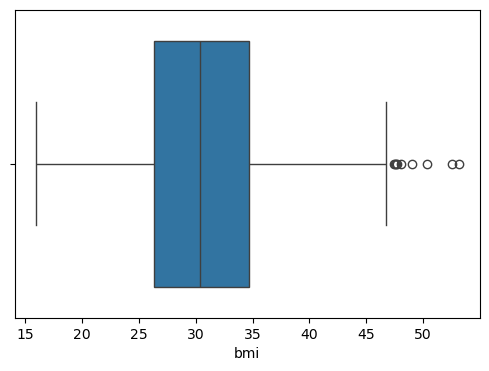

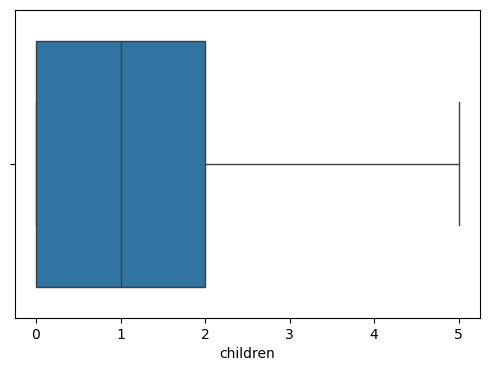

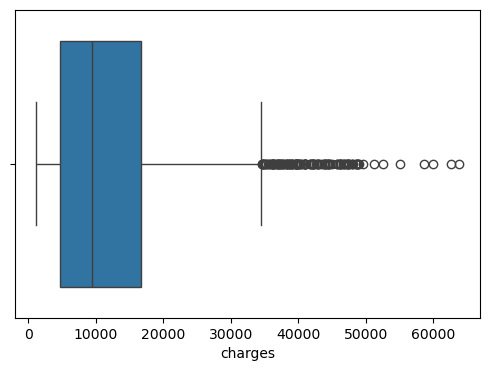

In [49]:
col=['age','bmi','children','charges']
for np in col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[np])

In [50]:
df_clean=df.drop_duplicates()

In [51]:
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [52]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [53]:
le=LabelEncoder()
for col in ['sex', 'smoker']:
    df[col] = le.fit_transform(df[col])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [55]:
df=pd.get_dummies(df,columns=['region'])

In [56]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,False,True


In [57]:
df_pd=df.astype(int)

In [58]:
df_pd=df_pd.rename(
 columns={
'sex':'is_female',
'children':'red'
})
df_pd

,age,is_female,bmi,red,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,0,1,0,0
1334,18,0,31,0,0,2205,1,0,0,0
1335,18,0,36,0,0,1629,0,0,1,0
1336,21,0,25,0,0,2007,0,0,0,1


<Axes: xlabel='bmi'>

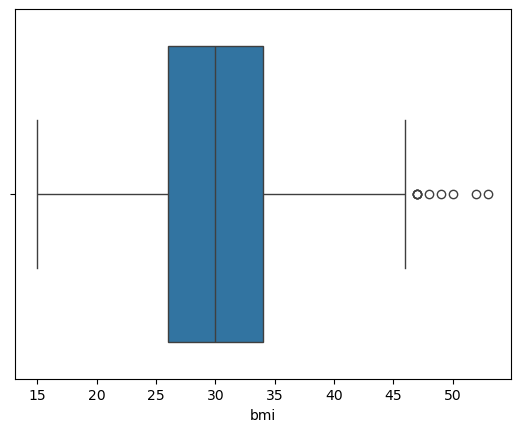

In [59]:
df_pd['bmi']
sns.boxplot(x= df_pd['bmi'])

In [60]:
Q1 = df_pd['bmi'].quantile(0.25)
Q3 = df_pd['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]



<Axes: ylabel='Density'>

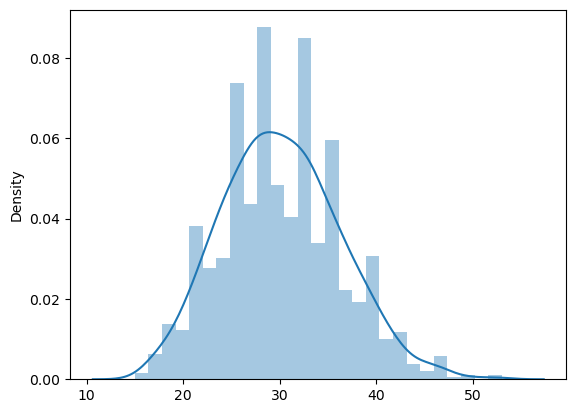

In [61]:
df_pd['bmi']
sns.distplot(x=df_pd['bmi'])

In [62]:
upper=df_pd['bmi'].mean()+3*df_pd['bmi'].std()
lower=df_pd['bmi'].mean()-3*df_pd['bmi'].std()
print(upper)
print(lower)

48.529281355623375
11.810031050953604


In [63]:
df_pd.loc[(df_pd['bmi']>upper) | (df_pd['bmi']<lower)]

,age,is_female,bmi,red,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
116,58,1,49,0,0,11381,0,0,1,0
847,23,1,50,1,0,2438,0,0,1,0
1047,22,1,52,1,1,44501,0,0,1,0
1317,18,1,53,0,0,1163,0,0,1,0


In [64]:
new_df=df_pd.loc[(df_pd['bmi']<upper) & (df_pd['bmi']>lower)]
print(len(new_df))

1334


In [65]:
new_df

,age,is_female,bmi,red,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,0,1,0,0
1334,18,0,31,0,0,2205,1,0,0,0
1335,18,0,36,0,0,1629,0,0,1,0
1336,21,0,25,0,0,2007,0,0,0,1


In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for col in ['age','bmi']:
     df[col]=scaler.fit_transform(df[[col]])

In [67]:
new_df

,age,is_female,bmi,red,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,0,1,0,0
1334,18,0,31,0,0,2205,1,0,0,0
1335,18,0,36,0,0,1629,0,0,1,0
1336,21,0,25,0,0,2007,0,0,0,1


In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for col in ['age','bmi']:
     new_df[col]=scaler.fit_transform(new_df[[col]])

In [69]:
new_df

,age,is_female,bmi,red,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.442249,0,-0.516258,0,1,16884,0,0,0,1
1,-1.513528,1,0.480637,1,0,1725,0,0,1,0
2,-0.800739,1,0.480637,3,0,4449,0,0,1,0
3,-0.444344,1,-1.347003,0,0,21984,0,1,0,0
4,-0.515623,1,-0.350109,0,0,3866,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.767397,1,-0.017811,3,0,10600,0,1,0,0
1334,-1.513528,0,0.148339,0,0,2205,1,0,0,0
1335,-1.513528,0,0.979084,0,0,1629,0,0,1,0
1336,-1.299692,0,-0.848556,0,0,2007,0,0,0,1


In [70]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,0,1,16884.92400,False,False,False,True
1,-1.509965,1,0.509621,1,0,1725.55230,False,False,True,False
2,-0.797954,1,0.383307,3,0,4449.46200,False,False,True,False
3,-0.441948,1,-1.305531,0,0,21984.47061,False,True,False,False
4,-0.513149,1,-0.292556,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,10600.54830,False,True,False,False
1334,-1.509965,0,0.206139,0,0,2205.98080,True,False,False,False
1335,-1.509965,0,1.014878,0,0,1629.83350,False,False,True,False
1336,-1.296362,0,-0.797813,0,0,2007.94500,False,False,False,True


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [83]:
X= new_df[['age','bmi','red','smoker']]
y=new_df['charges']

In [84]:
model=LinearRegression()
kf=KFold(n_splits=4,shuffle=True,random_state=42)
scores=cross_val_score(model,X,y,cv=kf,scoring='r2')


In [85]:
scores.mean()

np.float64(0.7451086004123366)